In [4]:
import os 
import duckdb_query_graph
import json
import csv
import pandas as pd
from IPython.display import display, HTML
import matplotlib.pyplot as plt

#import duckdb
#cursor = duckdb.connect()
#print(cursor.execute('SELECT 42').fetchall())
cwd = os.getcwd()

# DuckDB query graph

In [2]:
profiling_dir = cwd+"/profiling"
print(profiling_dir)

/Users/chuyinghe/CLionProjects/duckdb-rl-back-up-visualization/query-graph/profiling


In [4]:
%cd profiling
%ls

/Users/chuyinghe/CLionProjects/duckdb-rl-back-up-visualization/query-graph/profiling
10a.sql.json  16c.sql.json  21b.sql.json  29a.sql.json  4c.sql.json
10b.sql.json  16d.sql.json  21c.sql.json  29b.sql.json  5a.sql.json
10c.sql.json  17a.sql.json  22a.sql.json  29c.sql.json  5b.sql.json
11a.sql.json  17b.sql.json  22b.sql.json  2a.sql.json   5c.sql.json
11b.sql.json  17c.sql.json  22c.sql.json  2b.sql.json   6a.sql.json
11c.sql.json  17d.sql.json  22d.sql.json  2c.sql.json   6b.sql.json
11d.sql.json  17e.sql.json  23a.sql.json  2d.sql.json   6c.sql.json
12a.sql.json  17f.sql.json  23b.sql.json  30a.sql.json  6d.sql.json
12b.sql.json  18a.sql.json  23c.sql.json  30b.sql.json  6e.sql.json
12c.sql.json  18b.sql.json  24a.sql.json  30c.sql.json  6f.sql.json
13a.sql.json  18c.sql.json  24b.sql.json  31a.sql.json  7a.sql.json
13b.sql.json  19a.sql.json  25a.sql.json  31b.sql.json  7b.sql.json
13c.sql.json  19b.sql.json  25b.sql.json  31c.sql.json  7c.sql.json
13d.sql.json  19c.sql.json  25c

In [13]:
counter = 0
for json_filename in os.listdir(profiling_dir):
    if(json_filename != ".DS_Store"):
        counter+=1
        html_filename = json_filename +'.html'
        json_dir = profiling_dir +"/"+ json_filename
        html_dir = profiling_dir +"/"+ html_filename

        print(json_dir, " --> ", html_dir)
        test = duckdb_query_graph.generate(json_dir, html_dir)
    
print("🧽🧽🧽🧽🧽🧽🧽🧽🧽🧽🧽🧽counter = ", counter)

/Users/chuyinghe/CLionProjects/duckdb-rl/query-graph/profiling/17c.sql.json  -->  /Users/chuyinghe/CLionProjects/duckdb-rl/query-graph/profiling/17c.sql.json.html
<script>
var graph_json = '{    "result": 1.885597,    "timings": {       "optimizer": 0.007862,       "optimizer > column_lifetime": 0.000018,       "optimizer > common_aggregate": 0.000002,       "optimizer > common_subexpressions": 0.000002,       "optimizer > deliminator": 0.000001,       "optimizer > expression_rewriter": 0.000137,       "optimizer > filter_pullup": 0.000002,       "optimizer > filter_pushdown": 0.000192,       "optimizer > in_clause": 0.000001,       "optimizer > join_order": 0.007446,       "optimizer > regex_range": 0.000001,       "optimizer > reorder_filter": 0.000005,       "optimizer > statistics_propagation": 0.000027,       "optimizer > top_n": 0.000001,       "optimizer > unused_columns": 0.000012,       "physical_planner": 0.000063,       "physical_planner > column_binding": 0.000020,       "p

<script>
var graph_json = '{    "result": 2.915254,    "timings": {       "optimizer": 0.010473,       "optimizer > column_lifetime": 0.000033,       "optimizer > common_aggregate": 0.000003,       "optimizer > common_subexpressions": 0.000003,       "optimizer > deliminator": 0.000001,       "optimizer > expression_rewriter": 0.000341,       "optimizer > filter_pullup": 0.000002,       "optimizer > filter_pushdown": 0.000412,       "optimizer > in_clause": 0.000004,       "optimizer > join_order": 0.009582,       "optimizer > regex_range": 0.000001,       "optimizer > reorder_filter": 0.000007,       "optimizer > statistics_propagation": 0.000045,       "optimizer > top_n": 0.000000,       "optimizer > unused_columns": 0.000019,       "physical_planner": 0.000098,       "physical_planner > column_binding": 0.000036,       "physical_planner > create_plan": 0.000039,       "physical_planner > resolve_types": 0.000010,       "planner": 0.000289,       "planner > binder": 0.000282    },  

# Plotting

plotting the *.json under duckdb-rl-back-up-visualization/query-graph/profiling

In [35]:
# function: clean the data
# drop useless columns, rename column names, move 'job_query' column to the first, sort by 'job_query'
def clean_df(df):
    df = df.drop(['tree.name', 'tree.timing', 'tree.cardinality', 'tree.extra_info', 'tree.children'], axis = 1)
    df.columns = df.columns.str.replace('[>]','.', regex=True)
    df.columns = df.columns.str.replace('[ ]','', regex=True)
    df = df[ ['job_query'] + [ col for col in df.columns if col != 'job_query' ] ]
    df.sort_values(by = 'job_query')
    return df

In [36]:
# function: load json files
def read_json_from_dir(folder_dir, df):
    count_json = 0 #initialize amount of json files
    for file in os.listdir(folder_dir):
        if file.endswith(".json"):
            file_dir = folder_dir+'/'+file
            with open(file_dir, 'r') as f:
                count_json+=1
                data = f.read()
                data_df = pd.json_normalize(json.loads(data))
                data_df['job_query'] = file
                #print(type(data_df))
                df = pd.concat([df,data_df], sort=False)
    df = clean_df(df)
    print(str(count_json) + " json files have been loaded!")
    return df

### 1. JOB with DuckDB Optimizer

In [39]:
job_duckdb_dir = cwd + '/records/0426 profiling with DuckDB optimizer'

In [42]:
df_1 = pd.DataFrame() #initialize datafram
df_1 = read_json_from_dir(job_duckdb_dir, df_1)
display(df_1)

113 json files have been loaded!


,job_query,result,timings.optimizer,timings.optimizer.column_lifetime,timings.optimizer.common_aggregate,timings.optimizer.common_subexpressions,timings.optimizer.deliminator,timings.optimizer.expression_rewriter,timings.optimizer.filter_pullup,timings.optimizer.filter_pushdown,...,timings.optimizer.reorder_filter,timings.optimizer.statistics_propagation,timings.optimizer.top_n,timings.optimizer.unused_columns,timings.physical_planner,timings.physical_planner.column_binding,timings.physical_planner.create_plan,timings.physical_planner.resolve_types,timings.planner,timings.planner.binder
0,17c.sql.json,2.140658,0.017334,0.000026,0.000003,0.000003,0.000001,0.000336,0.000003,0.000505,...,0.000006,0.000042,0.000000,0.000018,0.000101,0.000030,0.000047,0.000009,0.000580,0.000566
0,17b.sql.json,2.188336,0.011022,0.000023,0.000003,0.000002,0.000001,0.000180,0.000001,0.000253,...,0.000004,0.000036,0.000000,0.000016,0.000079,0.000026,0.000031,0.000009,0.000233,0.000228
0,6f.sql.json,3.997761,0.001101,0.000024,0.000004,0.000003,0.000001,0.000026,0.000001,0.000150,...,0.000006,0.000023,0.000001,0.000013,0.000068,0.000021,0.000029,0.000006,0.000162,0.000156
0,22c.sql.json,4.166532,0.011018,0.000068,0.000005,0.000003,0.000002,0.000157,0.000001,0.000416,...,0.000008,0.000066,0.000001,0.000029,0.000136,0.000051,0.000052,0.000013,0.000450,0.000442
0,22b.sql.json,3.430952,0.011211,0.000109,0.000007,0.000010,0.000002,0.000153,0.000002,0.000543,...,0.000014,0.000355,0.000001,0.000042,0.000219,0.000064,0.000108,0.000018,0.000374,0.000368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,27c.sql.json,2.069122,0.012384,0.000093,0.000004,0.000004,0.000001,0.000471,0.000002,0.000554,...,0.000008,0.000060,0.000001,0.000030,0.000138,0.000058,0.000050,0.000013,0.000293,0.000285
0,27b.sql.json,1.651111,0.010810,0.000085,0.000004,0.000004,0.000001,0.000345,0.000002,0.000500,...,0.000008,0.000059,0.000001,0.000026,0.000142,0.000062,0.000049,0.000013,0.000269,0.000261
0,16a.sql.json,5.288608,0.010508,0.000024,0.000003,0.000002,0.000001,0.000055,0.000001,0.000343,...,0.000005,0.000033,0.000001,0.000015,0.000073,0.000026,0.000030,0.000007,0.000288,0.000281
0,9a.sql.json,2.059143,0.011563,0.000028,0.000004,0.000003,0.000001,0.000426,0.000002,0.000345,...,0.000007,0.000044,0.000000,0.000024,0.000099,0.000036,0.000036,0.000011,0.000257,0.000249


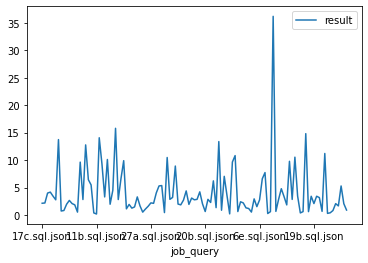

In [43]:
df_1[['job_query','result']].plot(x='job_query')
plt.show()

### 2. JOB without any Optimizer

In [45]:
job_no_optimizer_dir = cwd + '/records/0427 profiling without optimizer'

In [46]:
df_2 = pd.DataFrame() #initialize datafram
df_2 = read_json_from_dir(job_no_optimizer_dir, df_2)
display(df_2)

113 json files have been loaded!


,job_query,result,timings.optimizer,timings.optimizer.column_lifetime,timings.optimizer.common_aggregate,timings.optimizer.common_subexpressions,timings.optimizer.deliminator,timings.optimizer.expression_rewriter,timings.optimizer.filter_pullup,timings.optimizer.filter_pushdown,...,timings.optimizer.reorder_filter,timings.optimizer.statistics_propagation,timings.optimizer.top_n,timings.optimizer.unused_columns,timings.physical_planner,timings.physical_planner.column_binding,timings.physical_planner.create_plan,timings.physical_planner.resolve_types,timings.planner,timings.planner.binder
0,17c.sql.json,1.885597,0.007862,0.000018,0.000002,0.000002,0.000001,0.000137,0.000002,0.000192,...,0.000005,0.000027,0.000001,0.000012,0.000063,0.000020,0.000027,0.000007,0.000189,0.000183
0,17b.sql.json,1.995868,0.014394,0.000025,0.000002,0.000003,0.000001,0.000265,0.000002,0.000373,...,0.000006,0.000031,0.000000,0.000016,0.000094,0.000030,0.000043,0.000008,0.000359,0.000349
0,6f.sql.json,3.195914,0.001045,0.000021,0.000003,0.000002,0.000000,0.000028,0.000001,0.000141,...,0.000005,0.000022,0.000001,0.000013,0.000064,0.000019,0.000026,0.000008,0.000173,0.000166
0,22c.sql.json,2.609435,0.010276,0.000075,0.000004,0.000004,0.000001,0.000151,0.000001,0.000410,...,0.000008,0.000053,0.000001,0.000043,0.000130,0.000050,0.000048,0.000015,0.000236,0.000230
0,22b.sql.json,2.089543,0.009369,0.000063,0.000005,0.000004,0.000001,0.000151,0.000002,0.000403,...,0.000009,0.000045,0.000001,0.000022,0.000115,0.000045,0.000043,0.000012,0.000249,0.000241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,27c.sql.json,1.933313,0.013797,0.000098,0.000005,0.000004,0.000002,0.000454,0.000001,0.000553,...,0.000008,0.000060,0.000000,0.000032,0.000154,0.000065,0.000054,0.000015,0.000294,0.000286
0,27b.sql.json,1.642393,0.011863,0.000087,0.000005,0.000003,0.000002,0.000377,0.000002,0.000563,...,0.000008,0.000053,0.000001,0.000030,0.000133,0.000056,0.000048,0.000012,0.000314,0.000305
0,16a.sql.json,4.979285,0.008898,0.000020,0.000002,0.000002,0.000001,0.000048,0.000001,0.000280,...,0.000004,0.000028,0.000000,0.000013,0.000068,0.000023,0.000027,0.000007,0.000206,0.000201
0,9a.sql.json,2.609519,0.010083,0.000027,0.000004,0.000003,0.000001,0.000379,0.000002,0.000401,...,0.000008,0.000043,0.000001,0.000017,0.000096,0.000036,0.000035,0.000011,0.000243,0.000235


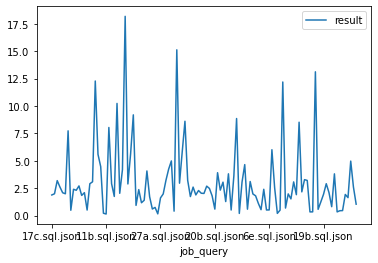

In [48]:
df_2[['job_query','result']].plot(x='job_query')
plt.show()

### 3. JOB without join-order Optimizer
todo...

### now plot them together in one graph:

<AxesSubplot:xlabel='job_query'>

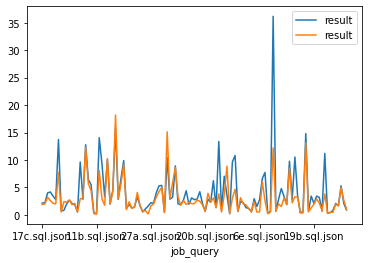

In [50]:
ax = df_1[['job_query','result']].plot(x='job_query')
df_2[['job_query','result']].plot(x='job_query', ax = ax)

### ------------------ draft --------------------

In [8]:
test_data = {
    'A':['A1', 'A2', 'A3', 'A4', 'A5'], 
    'B':['B1', 'B2', 'B3', 'B4', 'B5'], 
    'C':['C1', 'C2', 'C3', 'C4', 'C5'], 
    'D':['D1', 'D2', 'D3', 'D4', 'D5'], 
    'E':['E1', 'E2', 'E3', 'E4', 'E5'] }
test_df = pd.DataFrame(test_data)

In [55]:
display(test_df)

,A,B,C,D,E
0,A1,B1,C1,D1,E1
1,A2,B2,C2,D2,E2
2,A3,B3,C3,D3,E3
3,A4,B4,C4,D4,E4
4,A5,B5,C5,D5,E5


In [57]:
test_df.drop(['C','D'], axis =1)

,A,B,E
0,A1,B1,E1
1,A2,B2,E2
2,A3,B3,E3
3,A4,B4,E4
4,A5,B5,E5
